In [11]:
#!pip install mlrose_hiive
#!pip install pickle5

In [12]:
# Part 2: Find optimal weights for neural networks and compare performance
# See MLRose documentation for source

import time
import mlrose_hiive as mlrose
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle5 as pickle
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format='retina'

random_seed = 42

In [13]:
def import_dataset2():
    #X, y = pd.read_pickle('X2.pkl'), pd.read_pickle('y2.pkl')
    with open('X2.pkl', "rb") as fh:
        X = pickle.load(fh)
    with open('y2.pkl', "rb") as fh:
        y = pickle.load(fh)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

    print("number of training samples: ", len(X_train))
    print("number of test samples: ", len(y_test))
    return X_train, X_test, y_train, y_test

# import dataset 2 from pickle files
X_train, X_test, y_train, y_test = import_dataset2()

scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

number of training samples:  2520
number of test samples:  630


In [14]:
# Gradient descent algorithm
nn_rhc_gd = mlrose.NeuralNetwork(hidden_nodes=[3],
                                 curve=True,
                                 activation='relu',
                                 algorithm='gradient_descent',
                                 max_iters=512,
                                 bias=True,
                                 learning_rate=0.001,
                                 early_stopping=True,
                                 max_attempts=100,
                                 random_state=random_seed)

start_time = time.time()
nn_rhc_gd.fit(X_train_std, y_train)
sgd_runtime = (time.time() - start_time)
print("")
print(f'time to run GD {sgd_runtime:.3f} seconds')

# Predict labels for train set and evaluate results
print("Gradient Descent:")
y_train_pred_grad_desc = nn_rhc_gd.predict(X_train_std)
y_train_f1_gd = round(f1_score(y_train, y_train_pred_grad_desc, average='weighted'), 3)

print("y_train_F1:", y_train_f1_gd)

# Predict labels for test set and evaluate results
y_test_pred_grad_desc = nn_rhc_gd.predict(X_test_std)
y_test_f1_gd = round(f1_score(y_test, y_test_pred_grad_desc, average='weighted'), 3)

print("y_test_F1:", y_test_f1_gd)
print("")


time to run GD 2.066 seconds
Gradient Descent:
y_train_F1: 0.899
y_test_F1: 0.892



In [15]:
nn_rhc = mlrose.NeuralNetwork(hidden_nodes=[3],
                              curve=True,
                              activation='relu',
                              algorithm='random_hill_climb',
                              max_iters=512,
                              bias=True,
                              restarts=75,
                              learning_rate=0.001,
                              early_stopping=True,
                              max_attempts=100,
                              random_state=random_seed)

start_time = time.time()
nn_rhc.fit(X_train_std, y_train)
rhc_runtime = (time.time() - start_time)
print("")
print(f'time to run RHC {rhc_runtime:.3f} seconds')

# Predict labels for train set and evaluate results
print("Random Hill Climb:")
y_train_pred_rhc = nn_rhc.predict(X_train_std)
y_train_f1_rhc = round(f1_score(y_train, y_train_pred_rhc, average='weighted'), 3)

print("y_train_f1_rhc:", y_train_f1_rhc)

# Predict labels for test set and evaluate results
y_test_pred_rhc = nn_rhc.predict(X_test_std)
y_test_f1_rhc = round(f1_score(y_test, y_test_pred_rhc, average='weighted'), 3)

print("y_test_f1_rhc:", y_test_f1_rhc)
print("")


time to run RHC 107.727 seconds
Random Hill Climb:
y_train_f1_rhc: 0.725
y_test_f1_rhc: 0.735



In [16]:
nn_sa = mlrose.NeuralNetwork(hidden_nodes=[3],
                             curve=True,
                             activation='relu',
                             algorithm='simulated_annealing',
                             max_iters=512,
                             bias=True,
                             learning_rate=0.001,
                             early_stopping=True,
                             max_attempts=100,
                             random_state=random_seed)

start_time = time.time()
nn_sa.fit(X_train_std, y_train)
sa_runtime = (time.time() - start_time)
print("")
print(f'time to run SA: {sa_runtime:.3f} seconds')

# Predict labels for train set and evaluate results
print("Simulated Annealing:")
y_train_pred_sa = nn_sa.predict(X_train_std)

y_train_f1_sa = round(f1_score(y_train, y_train_pred_sa, average='weighted'), 3)

print("y_train_F1:", y_train_f1_sa)

# Predict labels for test set and evaluate results
y_test_pred_sa = nn_sa.predict(X_test_std)
y_test_f1_sa = round(f1_score(y_test, y_test_pred_sa, average='weighted'), 3)

print("y_test_F:1", y_test_f1_sa)

print("")


time to run SA: 1.929 seconds
Simulated Annealing:
y_train_F1: 0.721
y_test_F:1 0.733



In [17]:
nn_ga = mlrose.NeuralNetwork(hidden_nodes=[3],
                             activation='relu',
                             curve=True,
                             algorithm='genetic_alg',
                             max_iters=512,
                             bias=True,
                             learning_rate=0.001,
                             early_stopping=True,
                             max_attempts=100,
                             random_state=random_seed)

start_time = time.time()
nn_ga.fit(X_train_std, y_train)
ga_runtime = (time.time() - start_time)
print("")
print(f'time to run GA: {ga_runtime:.3f} seconds')

# Predict labels for train set and evaluate results
print("Genetic Algorithm:")
y_train_pred_ga = nn_ga.predict(X_train_std)
y_train_f1_ga = round(f1_score(y_train, y_train_pred_ga, average='weighted'), 3)
print("y_train f1:", y_train_f1_ga)

# Predict labels for test set and evaluate results
y_test_pred_ga = nn_ga.predict(X_test_std)
y_test_f1_ga = round(f1_score(y_test, y_test_pred_ga, average='weighted'), 3)
print("y_test f1:", y_test_f1_ga)


time to run GA: 154.176 seconds
Genetic Algorithm:
y_train f1: 0.771
y_test f1: 0.771


In [18]:
ga = [i[0] for i in nn_ga.fitness_curve]

def pad_or_truncate(some_list, target_len):
    return some_list[:target_len] + [np.nan]*(target_len - len(some_list))

ga_long = pad_or_truncate(ga,512)

In [21]:
#convergence_df['GD'].plot()

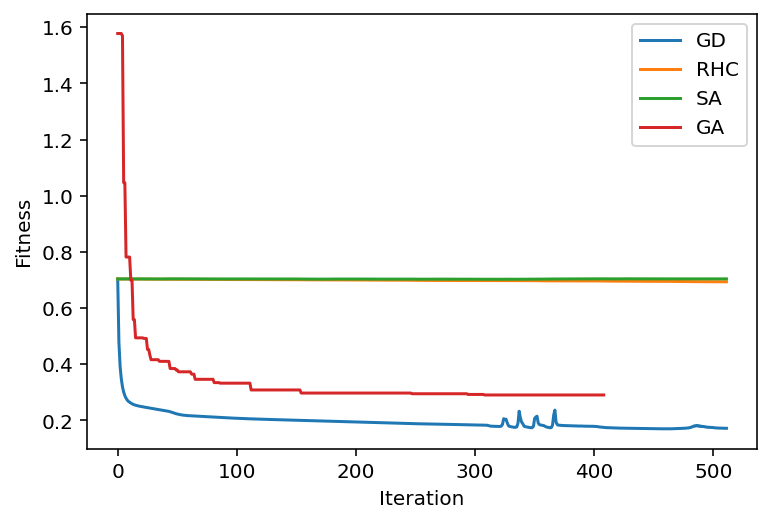

In [25]:
convergence_df = pd.DataFrame()
convergence_df['GD'] = nn_rhc_gd.fitness_curve
convergence_df['GD'] = convergence_df['GD'] * -1
convergence_df['RHC'] = [i[0] for i in nn_rhc.fitness_curve]
convergence_df['SA'] = [i[0] for i in nn_sa.fitness_curve]
convergence_df['GA'] = ga_long
convergence_df.plot()
plt.xlabel('Iteration')
plt.ylabel('Fitness');



In [23]:
runtimes = {'SGD': sgd_runtime, 'RHC': rhc_runtime, 'SA': sa_runtime, 'GA':ga_runtime}
runtimes_df = pd.DataFrame.from_dict(runtimes,orient='index')
runtimes_df.columns = ['Train Runtimes (seconds)']

runtimes_df['Train F1'] = y_train_f1_gd, y_train_f1_rhc, y_train_f1_sa, y_train_f1_ga
runtimes_df['Test F1'] = y_test_f1_gd, y_test_f1_rhc, y_test_f1_sa, y_test_f1_ga

runtimes_df

,Train Runtimes (seconds),Train F1,Test F1
SGD,2.065503,0.899,0.892
RHC,107.727262,0.725,0.735
SA,1.928535,0.721,0.733
GA,154.176349,0.771,0.771
